create sample:
- get NTL


https://sidra.ibge.gov.br/tabela/6579

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [2]:
nightlights = pd.read_csv('../dataset/nightlights_per_city.csv')

In [9]:
# WINSORIZATION - DETECT OUTLIERS

all_nighttime_lights = nightlights[nightlights['radiance'] > 0]
all_nighttime_lights['w_radiance'] = winsorize(all_nighttime_lights['radiance'],(0,0.00001))
all_nighttime_lights.sort_values('radiance', ascending=False).head(10)

# elements = nightlights['radiance']
# mean = np.mean(elements, axis=0)
# sd = np.std(elements, axis=0)
# final_list = nightlights[nightlights['radiance'] < mean + 3*sd]
# final_list = final_list[final_list['radiance'] > 0]
# print(mean)
# print(sd)
# print(final_list)

/var/folders/fx/kx7__pwn2tv9449n14s5rx1w0000gn/T/ipykernel_85424/2151036175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nighttime_lights['w_radiance'] = winsorize(all_nighttime_lights['radiance'],(0,0.00001))


,lat,long,radiance,geometry,index_right,CD_MUN,NM_MUN,SIGLA,AREA_KM2,w_radiance
22174224,-10.154167,-55.704166,3190.1287,POINT (-55.70416567229999 -10.1541673479),5210,5102793,Carlinda,MT,2421.788,115.21909
22174090,-10.150001,-55.704166,3190.1226,POINT (-55.70416567229999 -10.150000681199998),5210,5102793,Carlinda,MT,2421.788,115.21909
30747448,-16.000001,-42.420832,1725.5355,POINT (-42.42083223270001 -16.000000728000003),2771,3145372,Novorizonte,MG,271.610,115.21909
30747447,-16.000001,-42.424999,1725.5334,POINT (-42.42499889940001 -16.000000728000003),2771,3145372,Novorizonte,MG,271.610,115.21909
37678419,-23.354167,-51.445832,1194.7955,POINT (-51.4458323049 -23.3541674535),4222,4122404,Rolândia,PR,459.024,115.21909
36936088,-22.283334,-41.724999,1191.8042,POINT (-41.724998893800006 -22.2833341116),3211,3302403,Macaé,RJ,1216.989,115.21909
37678461,-23.358334,-51.445832,1186.2058,POINT (-51.4458323049 -23.3583341202),4222,4122404,Rolândia,PR,459.024,115.21909
36936089,-22.283334,-41.720832,1092.9142,POINT (-41.7208322271 -22.2833341116),3211,3302403,Macaé,RJ,1216.989,115.21909
37950683,-23.641667,-46.487499,1042.3043,POINT (-46.48749893190001 -23.641667455800004),3801,3547809,Santo André,SP,175.782,115.21909
6973472,-4.862501,-65.295832,1035.7117,POINT (-65.29583241569999 -4.862500638900002),93,1301209,Coari,AM,57970.768,115.21909


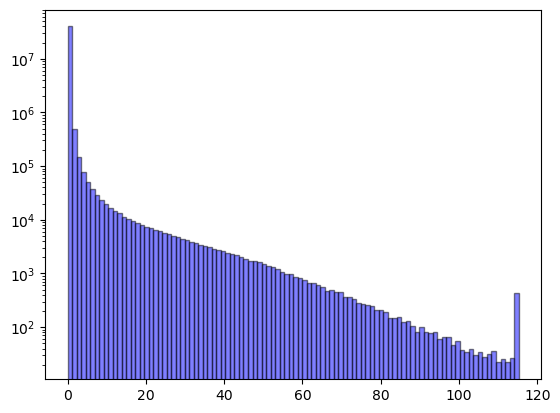

In [10]:
num_bins = 100
plt.hist(all_nighttime_lights['w_radiance'], bins=num_bins, alpha=0.5, color='b', edgecolor='black')
plt.yscale('log')

In [11]:
populacao = pd.read_excel('../dataset/populacao_estimada_2022.xlsx', skiprows=3, skipfooter=1)
populacao.columns = ['city_name', 'population']
populacao

,city_name,population
0,Alta Floresta D'Oeste (RO),21494
1,Ariquemes (RO),96833
2,Cabixi (RO),5351
3,Cacoal (RO),86887
4,Cerejeiras (RO),15890
...,...,...
5565,Vianópolis (GO),14956
5566,Vicentinópolis (GO),8768
5567,Vila Boa (GO),4215
5568,Vila Propício (GO),5815


In [12]:
populacao[['city', 'state']] = populacao['city_name'].str.split('(', expand=True)
populacao['state'] = populacao['state'].str.replace(')', '')
populacao['city'] = populacao['city'].apply(lambda x: x.strip())
del populacao['city_name']

/var/folders/fx/kx7__pwn2tv9449n14s5rx1w0000gn/T/ipykernel_85424/1043431228.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  populacao['state'] = populacao['state'].str.replace(')', '')


In [13]:
big_cities = populacao[populacao['population'] > 250000]
big_cities

,population,city,state
16,460434,Porto Velho,RO
66,364756,Rio Branco,AC
111,2063689,Manaus,AM
138,413486,Boa Vista,RR
160,478778,Ananindeua,PA
...,...,...,...
5316,300078,Várzea Grande,MT
5338,398869,Anápolis,GO
5341,527796,Aparecida de Goiânia,GO
5417,1437366,Goiânia,GO


In [14]:
codigos = pd.read_excel('../dataset/codigo_municipios.xls', skiprows=6)
codigos = codigos[['Código Município Completo', 'Nome_Município']]
codigos.columns = ['city_code', 'city']
codigos

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,city_code,city
0,1100015,Alta Floresta D'Oeste
1,1100379,Alto Alegre dos Parecis
2,1100403,Alto Paraíso
3,1100346,Alvorada D'Oeste
4,1100023,Ariquemes
...,...,...
5565,5222005,Vianópolis
5566,5222054,Vicentinópolis
5567,5222203,Vila Boa
5568,5222302,Vila Propício


In [15]:
cities_code = big_cities.merge(codigos, how='inner', on='city')
cities_code

,population,city,state,city_code
0,460434,Porto Velho,RO,1100205
1,364756,Rio Branco,AC,1200401
2,364756,Rio Branco,AC,5107206
3,2063689,Manaus,AM,1302603
4,413486,Boa Vista,RR,1400100
...,...,...,...,...
127,300078,Várzea Grande,MT,5108402
128,398869,Anápolis,GO,5201108
129,527796,Aparecida de Goiânia,GO,5201405
130,1437366,Goiânia,GO,5208707


In [16]:
filter_ntl = cities_code.merge(all_nighttime_lights, how='left', left_on=['city_code'], right_on=['CD_MUN'])
filter_ntl

,population,city,state,city_code,lat,long,radiance,geometry,index_right,CD_MUN,NM_MUN,SIGLA,AREA_KM2,w_radiance
0,460434,Porto Velho,RO,1100205,-7.979167,-63.620832,0.229079,POINT (-63.6208324023 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.229079
1,460434,Porto Velho,RO,1100205,-7.979167,-63.616666,0.255802,POINT (-63.6166657356 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.255802
2,460434,Porto Velho,RO,1100205,-7.979167,-63.612499,0.220094,POINT (-63.61249906889999 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.220094
3,460434,Porto Velho,RO,1100205,-7.979167,-63.608332,0.231341,POINT (-63.60833240219999 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.231341
4,460434,Porto Velho,RO,1100205,-7.979167,-63.604166,0.225163,POINT (-63.6041657355 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.225163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061809,2817381,Brasília,DF,5300108,-16.045834,-47.329166,0.318521,POINT (-47.329165605300005 -16.045834061700006),5571,5300108,Brasília,DF,5760.784,0.318521
1061810,2817381,Brasília,DF,5300108,-16.045834,-47.324999,0.364663,POINT (-47.3249989386 -16.045834061700006),5571,5300108,Brasília,DF,5760.784,0.364663
1061811,2817381,Brasília,DF,5300108,-16.045834,-47.320832,0.336667,POINT (-47.3208322719 -16.045834061700006),5571,5300108,Brasília,DF,5760.784,0.336667
1061812,2817381,Brasília,DF,5300108,-16.045834,-47.316666,0.280574,POINT (-47.3166656052 -16.045834061700006),5571,5300108,Brasília,DF,5760.784,0.280574


In [17]:
ntl_grouped = filter_ntl.groupby(['city_code', 'city', 'state']) \
       .agg(count=('radiance', 'size'), avg=('radiance', 'mean')) \
       .reset_index()
ntl_grouped = ntl_grouped[ntl_grouped['count'] > 100]
ntl_grouped

,city_code,city,state,count,avg
0,1100205,Porto Velho,RO,161691,0.419370
1,1200401,Rio Branco,AC,41977,0.590039
2,1302603,Manaus,AM,53299,1.505558
3,1400100,Boa Vista,RR,26726,1.109416
4,1500800,Ananindeua,PA,888,9.417551
...,...,...,...,...,...
127,5108402,Várzea Grande,MT,3514,5.960062
128,5201108,Anápolis,GO,4556,4.528398
129,5201405,Aparecida de Goiânia,GO,1366,15.369657
130,5208707,Goiânia,GO,3562,19.821063


In [18]:
ntl_grouped.groupby('state').count()

,city_code,city,count,avg
state,,,,
AC,2,2,2,2
AL,1,1,1,1
AM,1,1,1,1
AP,1,1,1,1
BA,4,4,4,4
CE,3,3,3,3
DF,1,1,1,1
ES,4,4,4,4
GO,3,3,3,3


In [19]:
ntl_grouped.to_csv('../dataset/big_cities_sample.csv', index=False)

In [20]:
filter_ntl = ntl_grouped.merge(all_nighttime_lights, how='left', left_on=['city_code'], right_on=['CD_MUN'])
filter_ntl

,city_code,city,state,count,avg,lat,long,radiance,geometry,index_right,CD_MUN,NM_MUN,SIGLA,AREA_KM2,w_radiance
0,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.620832,0.229079,POINT (-63.6208324023 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.229079
1,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.616666,0.255802,POINT (-63.6166657356 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.255802
2,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.612499,0.220094,POINT (-63.61249906889999 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.220094
3,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.608332,0.231341,POINT (-63.60833240219999 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.231341
4,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.604166,0.225163,POINT (-63.6041657355 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.225163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061809,5300108,Brasília,DF,27866,8.090337,-16.045834,-47.329166,0.318521,POINT (-47.329165605300005 -16.045834061700006),5571,5300108,Brasília,DF,5760.784,0.318521
1061810,5300108,Brasília,DF,27866,8.090337,-16.045834,-47.324999,0.364663,POINT (-47.3249989386 -16.045834061700006),5571,5300108,Brasília,DF,5760.784,0.364663
1061811,5300108,Brasília,DF,27866,8.090337,-16.045834,-47.320832,0.336667,POINT (-47.3208322719 -16.045834061700006),5571,5300108,Brasília,DF,5760.784,0.336667
1061812,5300108,Brasília,DF,27866,8.090337,-16.045834,-47.316666,0.280574,POINT (-47.3166656052 -16.045834061700006),5571,5300108,Brasília,DF,5760.784,0.280574


In [21]:
filter_ntl.to_csv('../dataset/filtered_nighttime_lights.csv', index=False)

VISUALIZATION

In [70]:
gdf = gpd.read_file('../../dataset/inputs/BR_Municipios_2021/BR_Municipios_2021.shp')

In [71]:
cities = filter_ntl['city_code'].unique()

In [72]:
gdf['sample'] = 0
gdf['CD_MUN'].astype(int)

# create a dictionary that maps each city code to a color
colors = {}

for index, row in gdf.iterrows():
    # compare the age value in the current row with the array elements
    colors[row['CD_MUN']] = '#222220'
    for city in cities:
        if row['CD_MUN'] == str(city):
            gdf.at[index, 'sample'] = 1
            colors[str(city)] = '#64AAE9'
            break

(-76.24759047174989,
 -26.590499411249958,
 -35.702328947549944,
 7.222992030550017)

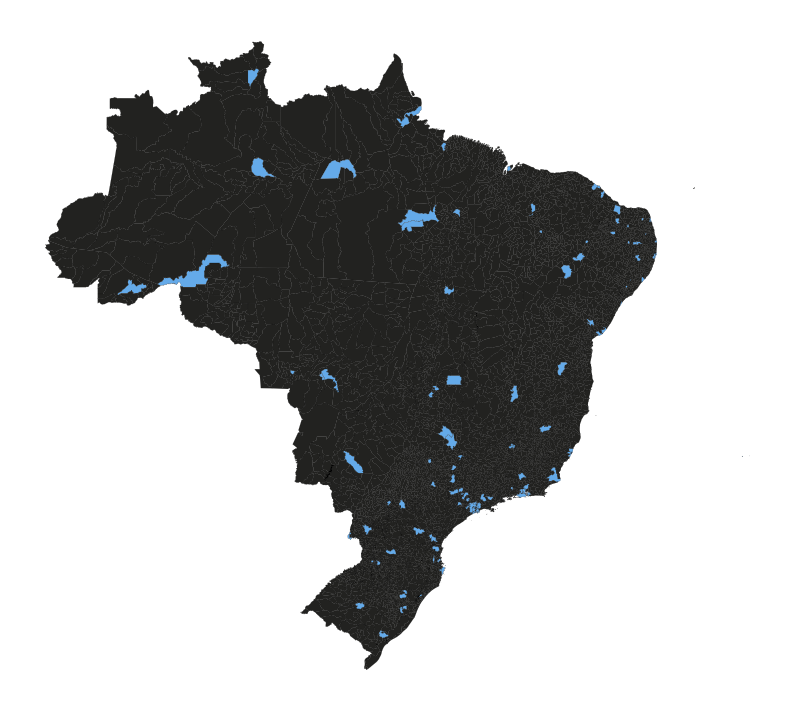

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_plot = gdf.plot(linewidth=0.1, edgecolor='black', legend=False, facecolor=[colors[code] for code in gdf['CD_MUN']], ax=ax)
ax.axis('off')